# Linear spectrum in presence of TE-TM and Omega

(by Dmitry R. Gulevich, ITMO University, St. Petersburg, 197101, Russia)

# 1. Model

$$
-\Delta \psi_{+} + \Re[U(x,y)]\,\psi_{+} + i \Im[U(x,y)]\,\psi_{+} 
+ \beta \left(\partial_x - i \partial_y\right)^2 \psi_{-} 
+ \Omega\psi_+ = E\psi_{+}
$$
$$
-\Delta \psi_{-} + \Re[U(x,y)]\,\psi_{-} + i \Im[U(x,y)]\,\psi_{-} 
+ \beta \left(\partial_x + i \partial_y\right)^2 \psi_{+}
- \Omega\psi_- = E\psi_{-}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import exp2d # my module
import imp
#imp.reload(exp2d) # reload exp2d after update

In [2]:
### Polariton parameters
hbar=1.05e-34 # reduced Planck constant, J s
me=9.1e-31 # electron mass, kg
meff=5.0e-5*me # exciton-polariton effective mass, kg
aratio=-0.05 # nonlinearity parameter $\alpha$
beta0=0.2 # TE-TM splitting parameter
Omega=15.0 # Magnetic field

In [3]:
M=40 # discretization, even number
Nbands=20 # number of bands

In [4]:
## Define unit cell potential: Lieb lattice
Lconstant = 5.8 # lattice constant, micron
Rpillar = 1.5 # pillar radius, micron
UinmeV=0.-0.1*1j # meV
UoutmeV=10-0.5*1j # meV
E0=hbar*hbar/(2.*meff*Lconstant*Lconstant*1.e-12)/(1.6e-22) # characteristic energy, meV
U = exp2d.U_Lieb(M, Rpillar/Lconstant, UinmeV/E0, UoutmeV/E0)

In [5]:
### Define unit cell potential: square lattice
# Lconstant = 5.0 # lattice constant, micron
# Rpillar = 2.5 # pillar radius, micron
# UinmeV=0.-0.1*1j # meV
# UoutmeV=10-0.5*1j # meV
# E0=hbar*hbar/(2.*meff*Lconstant*Lconstant*1.e-12)/(1.6e-22) # characteristic energy, meV
# U = exp2d.U_Square(M, Rpillar/Lconstant, UinmeV/E0, UoutmeV/E0)

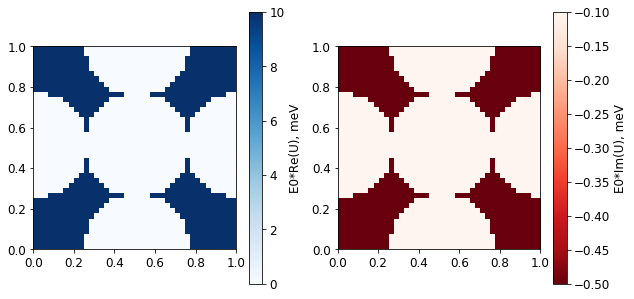

In [6]:
### Display potential
plt.rc('font', size=12)
fig,ax=plt.subplots(1,2,figsize=(10,5))
img0=ax[0].imshow(E0*U.real.T,cmap = plt.cm.Blues, extent=[0,1,0,1], origin='lower')
img1=ax[1].imshow(E0*U.imag.T,cmap = plt.cm.Reds_r, extent=[0,1,0,1], origin='lower')
plt.colorbar(img0,ax=ax[0],label='E0*Re(U), meV')
plt.colorbar(img1,ax=ax[1],label='E0*Im(U), meV')
plt.show()

In [7]:
### Calculate band structure
kxrange = np.linspace(-np.pi,np.pi,20)
kyrange=np.array([0.])
%time evalsarr,evecsarr = exp2d.eigsystem_tetm(M, U, kxrange, kyrange, 2*Nbands, 0.1, 0.0)

CPU times: user 27.5 s, sys: 383 ms, total: 27.8 s
Wall time: 13.9 s


Text(0,0.5,'$E, \\rm meV$')

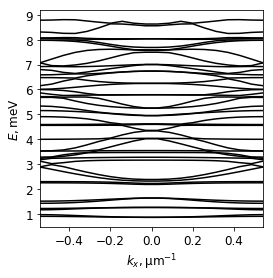

In [8]:
### Display the band structure
plt.rc('font', size=12)
fig,ax = plt.subplots(figsize=(4,4))
for i in range(2*Nbands):
    ax.plot(kxrange/Lconstant,E0*evalsarr[0][:,i],'k')  
ax.set_xlim([kxrange[0]/Lconstant,kxrange[-1]/Lconstant])
ax.set_xlabel(r"$k_x, \rm \mu m^{-1}$")
ax.set_ylabel(r"$E, \rm meV$")

In [9]:
### Calculate Bloch state at (kx,ky)=(0,0)
kxrange=np.array([0.])
kyrange=np.array([0.])
%time evalsarr,evecsarr = exp2d.eigsystem_tetm(M, U, kxrange, kyrange, Nbands, beta0, Omega)

CPU times: user 969 ms, sys: 40 ms, total: 1.01 s
Wall time: 519 ms


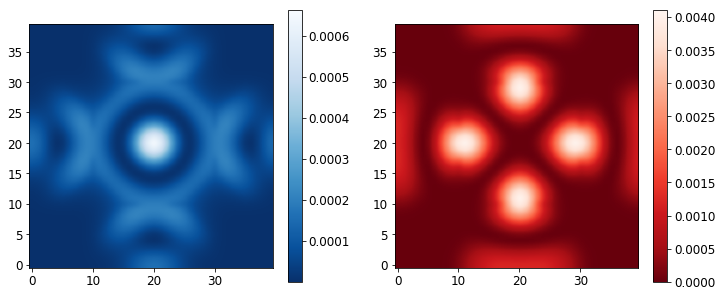

In [10]:
nv=15
exp2d.cpsi12(evecsarr[0,0][nv][::2].reshape(M,M),evecsarr[0,0][nv][1::2].reshape(M,M),interpolation='gaussian')